<a href="https://colab.research.google.com/github/xhackerino/DataAnalysisLab_1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

Enter 'a_11' multiplier for first equation: 1
Enter 'a_12' multiplier for first equation: 1
Enter 'b_1' multiplier for first equation: 2
Enter 'a_21' multiplier for second equation: 1
Enter 'a_22' multiplier for second equation: 1
Enter 'b2' multiplier for second equation: 9

You've got not specific results.
So, if graphics are parallel, then there are no any solutions,
if graphics are identical, then there are infinity number of solutions...



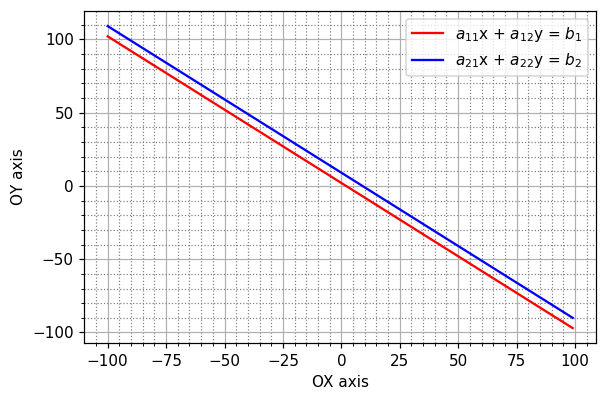

In [98]:
from scipy.linalg.misc import LinAlgError
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import solve

a11 = int(input("Enter 'a_11' multiplier for first equation: "))
a12 = int(input("Enter 'a_12' multiplier for first equation: "))
b1 = int(input("Enter 'b_1' multiplier for first equation: "))
a21 = int(input("Enter 'a_21' multiplier for second equation: "))
a22 = int(input("Enter 'a_22' multiplier for second equation: "))
b2 = int(input("Enter 'b2' multiplier for second equation: "))

x_range = list(range(-100,100))
y1 = [((b1-a11*x1)/a12) for x1 in x_range]
y2 = [((b2-a21*x2)/a22) for x2 in x_range]

eq_1 = np.array([
    [a11, a12], 
    [a21, a22]
    ])
eq_2 = np.array([b1, b2]).reshape((2,1))

fig, ax = plt.subplots()

try:
  res = solve(eq_1,eq_2)
  print("\nThe result is: \n", res)
  plt.plot(x_range, y1, c = 'red')
  plt.plot(x_range, y2, c = 'blue')
  ax.scatter(res[0], res[1], color='black')
  ax.grid(which='major')
  ax.minorticks_on() 
  ax.grid(which='minor',
          c='gray',
          linestyle=':')
  plt.xlabel(r"OX axis")
  plt.ylabel(r"ОY axis")
  plt.legend([
            r"$a_{11}$x + $a_{12}$y = $b_{1}$",
            r"$a_{21}$x + $a_{22}$y = $b_{2}$",
            ])
  fig.set_dpi(110)

except LinAlgError as lae:
  print("\nYou've got not specific results.")
  print("So, if graphics are parallel, then there are no any solutions,\nif\
 graphics are identical, then there are infinity number of solutions...\n")
  plt.plot(x_range,y1, c = 'red')
  plt.plot(x_range,y2,  c = 'blue')
  ax.grid(which='major')
  ax.minorticks_on() 
  ax.grid(which='minor',
        c='gray',
        linestyle=':')
  plt.xlabel(r"OX axis")
  plt.ylabel(r"ОY axis")
  plt.legend([
            r"$a_{11}$x + $a_{12}$y = $b_{1}$",
            r"$a_{21}$x + $a_{22}$y = $b_{2}$",
            ])
  fig.set_dpi(110)

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

The result is: 



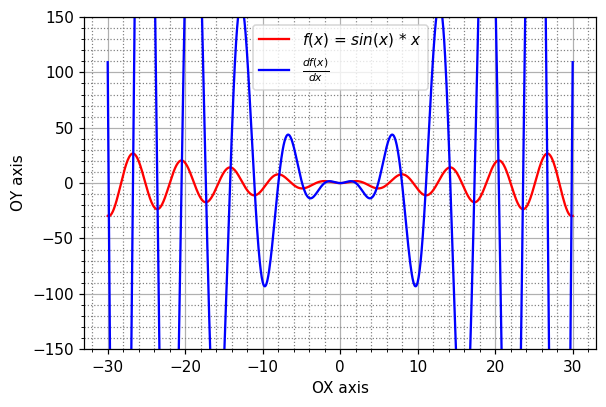

In [100]:
import torch
from matplotlib import pyplot as plt

x = torch.linspace(-30, 30, 1000, requires_grad=True)
y = torch.sin(x) * x
y.backward(x)

fig, ax = plt.subplots()
ax.set_ylim((-150, 150))
print("The result is: \n")
plt.plot(x.detach().numpy(), y.detach().numpy(), c = 'red')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), c = 'blue')
plt.xlabel(r"OX axis")
plt.ylabel(r"ОY axis")
ax.grid(which='major')
ax.minorticks_on() 
ax.grid(which='minor',
        c='gray',
        linestyle=':')
plt.legend([
            r"$f(x)$ = $sin(x)$ * ${x}$",
            r"$\frac{df(x)}{dx}$",
            ])
fig.set_dpi(110)